In [132]:
from math import pi
import pandas as pd
import numpy as np
import seaborn as sns
import requests
from pandas import json_normalize
import spotipy
import spotipy.util as util
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [64]:
playlist = sp.current_user_playlists()
pl = json_normalize(playlist['items'])

tracks = sp.playlist_tracks('2LlQtAk2KbOAGqgPwOUn9J') # tracks from playlist "fav"
tracks_df = pd.DataFrame.from_dict(tracks['items'])['track']

trackid = []
for i in tracks_df.items():
    trackid.append(i[1]['id'])

features = sp.audio_features(trackid)

## track analysis for 'Chieu Nay Khong Co Mua Bay'
```
{
  "danceability": 0.494,
  "energy": 0.433,
  "key": 0,
  "loudness": -7.809,
  "mode": 1,
  "speechiness": 0.0397,
  "acousticness": 0.791,
  "instrumentalness": 0,
  "liveness": 0.102,
  "valence": 0.492,
  "tempo": 171.917,
  "type": "audio_features",
  "id": "5CLVwtxgHf7Sq4whKzkyXj",
  "uri": "spotify:track:5CLVwtxgHf7Sq4whKzkyXj",
  "track_href": "https://api.spotify.com/v1/tracks/5CLVwtxgHf7Sq4whKzkyXj",
  "analysis_url": "https://api.spotify.com/v1/audio-analysis/5CLVwtxgHf7Sq4whKzkyXj",
  "duration_ms": 296557,
  "time_signature": 4
}

'num_samples': '6539081',
 'duration': 296.55695,
 'sample_md5': '',
 'offset_seconds': 0,
 'window_seconds': 0,
 'analysis_sample_rate': 22050.0,
 'analysis_channels': 1,
 'end_of_fade_in': 5.10839,
 'start_of_fade_out': 287.14377,
 'loudness': -7.809,
 'tempo': 171.917,
 'tempo_confidence': 0.202,
 'time_signature': 4,
 'time_signature_confidence': 0.992,
 'key': 0,
 'key_confidence': 0.603,
 'mode': 1,
 'mode_confidence': 0.621,
```

In [17]:
tr_a = sp.audio_analysis('5CLVwtxgHf7Sq4whKzkyXj')

In [127]:
import json
with open('sample_tr_a.json', 'w') as fp:
    json.dump(tr_a, fp)

In [128]:
tr_a.keys()

dict_keys(['meta', 'track', 'bars', 'beats', 'sections', 'segments', 'tatums'])

In [18]:
sm = tr_a['segments'] # 327 - index to 120s
bt = tr_a['beats'] # 330
br = tr_a['bars'] # 83
st = tr_a['sections'] # 4
tt = tr_a['tatums'] # 660

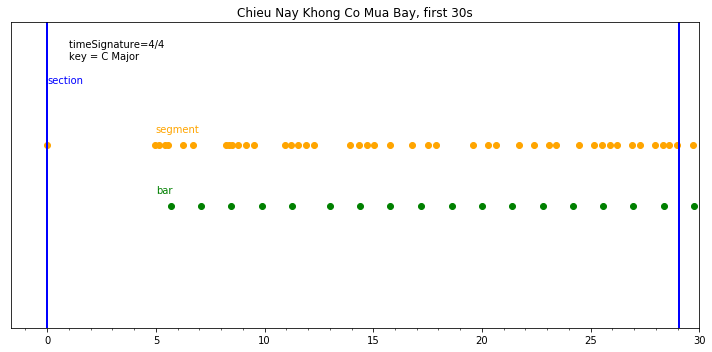

In [19]:
def get_s(l):
    return [i['start'] for i in l]

st_s = get_s(st[:2])
br_s = get_s(br[:18])
sm_s = get_s(sm[:45])

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(st_s, [2.5]*len(st_s), width=0.1, color='blue')
ax.scatter(sm_s, y=[1.5]*len(sm_s), color='orange')
ax.scatter(br_s, y=[1]*len(br_s), color='green')


ax.annotate('section',
            xy=(0, 2),
            fontsize='medium', color='blue')
ax.annotate('segment', color='orange',
            xy=(5, 1.6),
            fontsize='medium')
ax.annotate('bar', color='green',
            xy=(5, 1.1),
            fontsize='medium')
ax.annotate('timeSignature=4/4 \nkey = C Major',
            xy=(1, 2.2), ha='left',
            fontsize='medium')

ax.set_xlim(right=30)
ax.set_ylim(top=2.5)

ax.yaxis.set_visible(False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())

plt.title('Chieu Nay Khong Co Mua Bay, first 30s')
fig.tight_layout()
plt.savefig('30s.png')
plt.show()

In [200]:
# get track names
df = []
ind = []
for i, r in tracks_df.items():
    df.append(r['name'])

ft = pd.DataFrame(features)
ft.drop(['type', 'uri','track_href','analysis_url'], axis=1, inplace=True)
ft['name'] = df

# rescaling loudness
minx = -60
maxx = 0
ft['norm_loudness'] = (ft['loudness']-minx)/(maxx-minx)
ft.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,name,norm_loudness
0,0.619,0.394,5,-9.747,1,0.0444,0.0472,0.020000,0.100,0.123,124.000,0830WmzxBqOp9C93j8m9sN,319750,4,Sign Of The Times - Spotify Studios NYC,0.837550
1,0.531,0.317,1,-10.554,1,0.0260,0.8160,0.000001,0.113,0.302,149.917,1lhdtLh7c6Y21O36qxCXxD,291651,3,Và Thế Là Hết,0.824100
2,0.439,0.489,8,-6.286,1,0.0368,0.1320,0.000643,0.114,0.253,143.808,1zVhMuH7agsRe6XkljIY4U,250707,4,human,0.895233
3,0.331,0.235,10,-7.700,1,0.0299,0.9180,0.000000,0.137,0.218,171.232,69vToJ9BMbbLlFZo7k7A7B,204326,3,You Are The Reason,0.871667
4,0.788,0.427,5,-9.918,0,0.3080,0.0649,0.000036,0.171,0.605,97.038,5A1w94uzc1kO1Zhe8WWxC3,215227,4,Right Back,0.834700


In [221]:
# rescaling loudness
minx = -60
maxx = 0
ft['norm_loudness'] = (ft['loudness']-minx)/(maxx-minx)

# list of 8 features
ft_l = [0,1,5,6,7,8,9,15]

track_ft = ft.loc[ft['id']=='5CLVwtxgHf7Sq4whKzkyXj']

def spider_plot(ft_track, ft_l):
    # list of categories
    cat = ft_track.columns[ft_l].tolist()
    n = len(cat)
    
    # get values to plot
    v = ft_track.iloc[:, ft_l].values[0].tolist()
    v += v[:1]

    # Initialise the spider plot
    fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize=(6,6))

    angles = [i / float(n) * 2 * pi for i in range(n)]
    angles += angles[:1]
    thetaticks = np.arange(0,360,45)
    ax.set_thetagrids(thetaticks, labels=cat, fontsize=10)
    ax.set_rlabel_position(135)

    # Plot data
    ax.plot(angles, v, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, v, 'b', alpha=0.1)

    plt.show()

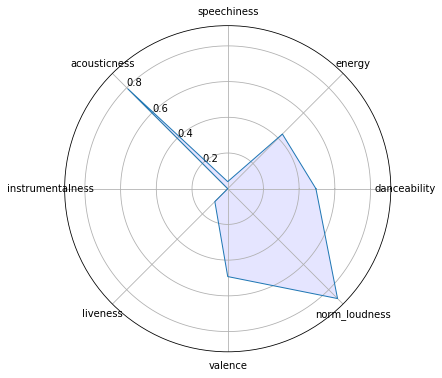

In [222]:
spider_plot(track_ft)

In [204]:
track_ft

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,name,norm_loudness
21,0.494,0.433,0,-7.809,1,0.0397,0.791,0.0,0.102,0.492,171.917,5CLVwtxgHf7Sq4whKzkyXj,296557,4,Chiều Nay Không Có Mưa Bay,0.86985


In [237]:
from spotipy import oauth2 as oauth

spo = oauth.SpotifyOAuth(username='h_vy', client_id=cid, client_secret=csc, redirect_uri=redirect_uri, scope=scope)
sp = spotipy.Spotify(oauth_manager=spo)
#token = spo.get_access_token()
#spo.refresh_access_token(token)
top_arts = sp.current_user_top_artists()

In [239]:
tk = spo.get_access_token()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:

You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.



In [247]:
[i['name'] for i in top_arts['items']]

['Davichi',
 'BIGBANG',
 'Bleachers',
 'EXO',
 'Taylor Swift',
 'Ariana Grande',
 'Eric Nam',
 'My Chemical Romance',
 'James Bay',
 'Charlie Puth',
 'Sir Colin Davis',
 'Westlife',
 'Post Malone',
 'James Arthur',
 'Christina Perri',
 'BLACKPINK',
 'Maroon 5',
 'Linkin Park',
 'Karita Mattila',
 'Nicky Jam']

In [57]:
import base64
import json

username = 'h_vy'
client_id = '24da2914fefb43e198bf76d87e121f9c'
client_secret = '79bc72fb858041078caac075f9c369dd'
redirect_uri = 'http://localhost'
scope = 'user-read-private'

spo = spotipy.oauth2.SpotifyOAuth(username=username, scope=scope,
                                   client_id=client_id, client_secret=client_secret, 
                                   redirect_uri=redirect_uri)
code = spo.get_authorization_code()

Using `localhost` as redirect URI without a port. Specify a port (e.g. `localhost:8080`) to allow automatic retrieval of authentication code instead of having to copy and paste the URL your browser is redirected to.


Enter the URL you were redirected to:  http://localhost/?code=AQDY5Vhh0wtOZvwAXh8Vyru0Xd3aOqPmx4KcJCJtLx0G9jhEQiRWgn5TAMnSYetG3zGpdmkHjpP31FDkIA3IaU-qcmftT3JZCzDufbq90aLtDocD94PGlsfDNfNPf3Rt1lcpCBsj19tGq7ifz8nJyhMX7m4U80zrS8wcPB3txLSzlyOQ_KHqNvsqNbaVwlnx_GDYvYvl_xQp


```
{'access_token': 'BQD10-6jr93aG0pocwFNoAPRmyXCsHb7OV5mIwb4eAnAsrPiyGi5GlqzQ-I1QzyZepFrnvbvf4tXNEAV9xjFkTxyACu6VzS6rFdFaEAJgzyojvIn-tLz7AfniaGvNDfO76a4EEPa7PpFx9ujb74',
 'token_type': 'Bearer',
 'expires_in': 3600,
 'refresh_token': 'AQB1LGpCg6Mpqra6oSIvc1grh19Xb5hs3o7-DBdcgI_JdNYPc07vy80wM4n4wEUHNw9VRwvBfmO_sr1BwVyXOOeMn4EGeiCti7cnuZ0iNffLyDga7KrHP-FP2nLwXmt0vdI',
 'scope': 'user-read-private',
 'expires_at': 1590096608}
```

```
#auth_header = "Authorization: Basic " + base64.b64encode((cid+":"+csc).encode('ascii')).decode('ascii')
#auth_url = 'https://accounts.spotify.com/api/token'
#payload = {"grant_type":"authorization_code", "code":code, "redirect_uri":r_uri}
#headers = {"Authorization": auth_header}
#a = requests.post(auth_url, data=payload, headers=headers)
```

In [74]:
sp = spotipy.Spotify(oauth_manager=spo)
kw_tracks = sp.playlist_tracks('37i9dQZF1DZ06evO16Ovq4')

In [ ]:
kw_df = pd.DataFrame.from_dict(kw_tracks['items'])[

trackid = []
for i in tracks_df.items():
    trackid.append(i[1]['id'])

features = sp.audio_features(trackid)

In [103]:
t_id = []
name = []
for i in kw_tracks['items']:
    t_id.append(i['track']['id'])
    name.append(i['track']['name'])

features = sp.audio_features(t_id)
ft_kw = pd.DataFrame(features).set_index('id')
name = pd.DataFrame(data={'name':name, 'id':t_id}).set_index('id')
ft_kw = pd.merge(ft_kw, name, left_index=True, right_index=True)
ft_kw.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,name
id,,,,,,,,,,,,,,,,,,
5NkpsRKvSBukdYQtl3WLZW,0.603,0.836,1,-2.338,0,0.0288,0.350,0.000000,0.099,0.558,102.040,audio_features,spotify:track:5NkpsRKvSBukdYQtl3WLZW,https://api.spotify.com/v1/tracks/5NkpsRKvSBuk...,https://api.spotify.com/v1/audio-analysis/5Nkp...,216556,4,Talk Love
5dh87xGcp4YqDFBc86Mh47,0.698,0.694,11,-5.500,0,0.0321,0.440,0.000004,0.308,0.489,94.998,audio_features,spotify:track:5dh87xGcp4YqDFBc86Mh47,https://api.spotify.com/v1/tracks/5dh87xGcp4Yq...,https://api.spotify.com/v1/audio-analysis/5dh8...,212976,4,Please don’t…
3SXg7A9M3pY2aWYdzQ0BMW,0.297,0.472,3,-6.849,1,0.0336,0.749,0.000000,0.195,0.327,61.154,audio_features,spotify:track:3SXg7A9M3pY2aWYdzQ0BMW,https://api.spotify.com/v1/tracks/3SXg7A9M3pY2...,https://api.spotify.com/v1/audio-analysis/3SXg...,238863,4,Beautiful Moment
5TLAKCWzRqi9AY1NdCe0q0,0.667,0.836,4,-2.894,1,0.0454,0.284,0.000000,0.230,0.891,107.984,audio_features,spotify:track:5TLAKCWzRqi9AY1NdCe0q0,https://api.spotify.com/v1/tracks/5TLAKCWzRqi9...,https://api.spotify.com/v1/audio-analysis/5TLA...,205660,4,Day 1
5zWWdqa4BF8tjygCS8E3rO,0.649,0.708,0,-5.508,1,0.0458,0.519,0.000000,0.458,0.709,96.975,audio_features,spotify:track:5zWWdqa4BF8tjygCS8E3rO,https://api.spotify.com/v1/tracks/5zWWdqa4BF8t...,https://api.spotify.com/v1/audio-analysis/5zWW...,233900,4,You don’t know love


In [112]:
mhib = ft_kw.loc[ft_kw['name']=='My heart is beating']

In [140]:
# rescaling loudness
minx = -60
maxx = 0
ft_kw['norm_loudness'] = (ft_kw['loudness']-minx)/(maxx-minx)
#ft_kw.drop(['type', 'uri','track_href','analysis_url'], axis=1, inplace=True)
# list of 8 features
ft_l = [0,1,5,6,7,8,9,14]

def spider_plot(ft_track, ft_l, cat):
    # list of categories
    n = len(cat)
    
    # get values to plot
    v = ft_track.iloc[:, ft_l].values[0].tolist()
    v += v[:1]

    # Initialise the spider plot
    fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize=(6,6))

    angles = [i / float(n) * 2 * pi for i in range(n)]
    angles += angles[:1]
    thetaticks = np.arange(0,360,45)
    ax.set_thetagrids(thetaticks, labels=cat, fontsize=10)
    ax.set_rlabel_position(135)

    # Plot data
    ax.plot(angles, v, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, v, 'b', alpha=0.1)

    plt.show()

In [119]:
mhib

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,name,norm_loudness
id,,,,,,,,,,,,,,,
6oAHHl93XiWHglVLI4SfBX,0.575,0.713,2,-4.935,1,0.0288,0.563,0.0,0.119,0.465,106.835,210495,4,My heart is beating,0.91775


In [120]:
ft_kw

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,name,norm_loudness
id,,,,,,,,,,,,,,,
5NkpsRKvSBukdYQtl3WLZW,0.603,0.836,1,-2.338,0,0.0288,0.350,0.000000,0.0990,0.5580,102.040,216556,4,Talk Love,0.961033
5dh87xGcp4YqDFBc86Mh47,0.698,0.694,11,-5.500,0,0.0321,0.440,0.000004,0.3080,0.4890,94.998,212976,4,Please don’t…,0.908333
3SXg7A9M3pY2aWYdzQ0BMW,0.297,0.472,3,-6.849,1,0.0336,0.749,0.000000,0.1950,0.3270,61.154,238863,4,Beautiful Moment,0.885850
5TLAKCWzRqi9AY1NdCe0q0,0.667,0.836,4,-2.894,1,0.0454,0.284,0.000000,0.2300,0.8910,107.984,205660,4,Day 1,0.951767
5zWWdqa4BF8tjygCS8E3rO,0.649,0.708,0,-5.508,1,0.0458,0.519,0.000000,0.4580,0.7090,96.975,233900,4,You don’t know love,0.908200
44uA7VQYsVEXsxaASQkaiQ,0.406,0.493,11,-7.507,1,0.0331,0.718,0.000000,0.1140,0.1400,135.765,241188,4,Right In Front Of you,0.874883
02eY5UMERLhSI43els4vKS,0.517,0.587,4,-6.331,0,0.0265,0.582,0.000000,0.0935,0.4250,95.979,209600,4,Like a star 별처럼,0.894483
0WHzRzinRoUzW7vX7xhSLD,0.510,0.527,3,-7.948,1,0.0294,0.655,0.000000,0.0773,0.2630,71.556,257254,4,Dropping the Tears,0.867533
3z9s9hp6ouAxH0IUojkC6L,0.359,0.683,1,-4.585,1,0.0505,0.501,0.000000,0.1240,0.6130,83.448,215667,4,Love Blossom,0.923583


In [130]:
import statsmodels.api as sm

model = sm.OLS(ft_kw.energy, ft_kw.danceability)
res = model.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                 energy   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              1039.
Date:                Fri, 22 May 2020   Prob (F-statistic):                    1.20e-34
Time:                        19:19:23   Log-Likelihood:                          29.086
No. Observations:                  50   AIC:                                     -56.17
Df Residuals:                      49   BIC:                                     -54.26
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [369]:
model = sm.OLS(ft_kw.instrumentalness, ft_kw.valence)
res = model.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:       instrumentalness   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.009
Method:                 Least Squares   F-statistic:                             0.5709
Date:                Fri, 22 May 2020   Prob (F-statistic):                       0.454
Time:                        22:41:14   Log-Likelihood:                          267.69
No. Observations:                  50   AIC:                                     -533.4
Df Residuals:                      49   BIC:                                     -531.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

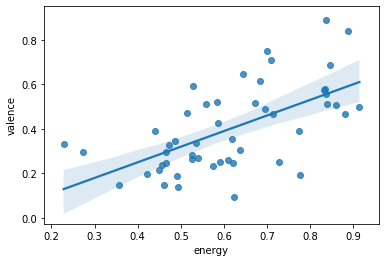

In [152]:
sns.regplot(ft_kw.energy, ft_kw.valence)

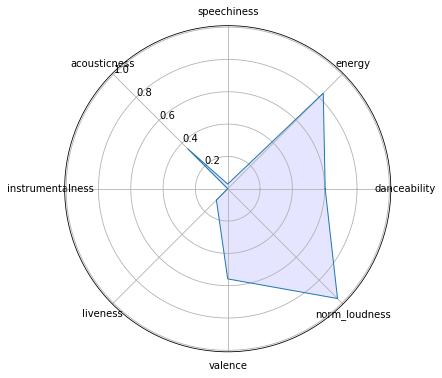

In [150]:
cat = ft_kw.columns[ft_l]
spider_plot(ft_kw.loc[ft_kw['name']=='Talk Love'], ft_l, cat)

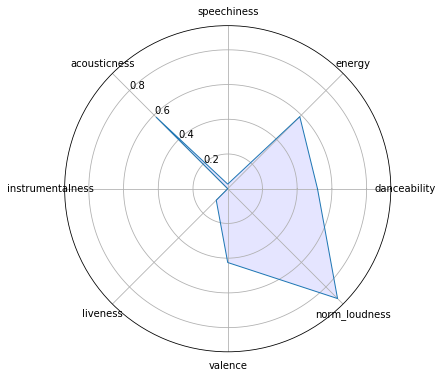

In [151]:
spider_plot(ft_kw.loc[ft_kw['name']=='Like a star 별처럼'], ft_l, cat)

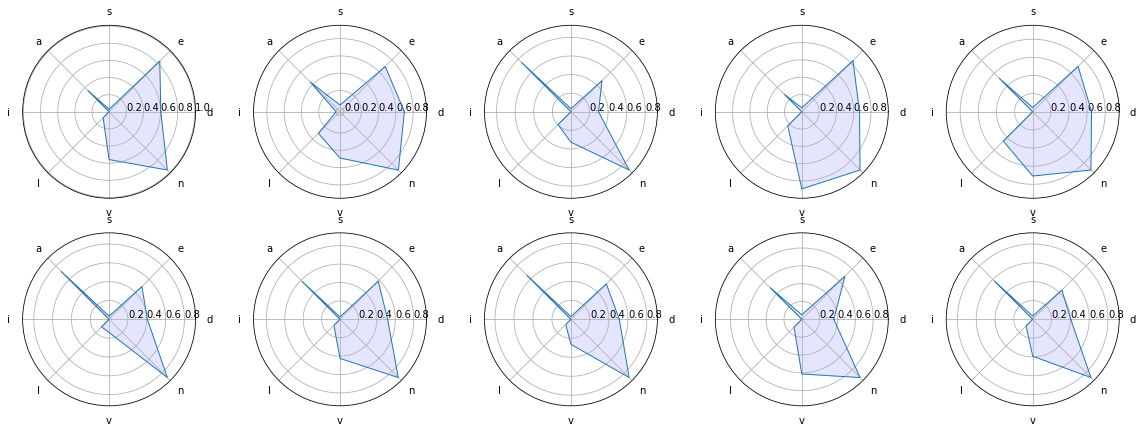

run time: 1.69


In [291]:
def spider_plot(track, l, cat, ax):
    
    # list of categories
    n = len(track)
    
    # duplicate first value to close the plot
    track += track[:1]

    angles = [i / float(n) * 2 * pi for i in range(n)]
    angles += angles[:1]

    # Plot data
    ax.plot(angles, track, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, track, 'b', alpha=0.1)
    
    thetaticks = np.arange(0,360,45)
    ax.set_thetagrids(thetaticks, labels=cat, fontsize=10)
    ax.set_rlabel_position(0)

# Initialise the spider plot
fig, axes = plt.subplots(nrows=2, ncols=5, subplot_kw=dict(polar=True), figsize=(20, 7))

w, h = 5, 2
l [[x, y] for x in range(h) for y in range(w)]
#l = list(zip([0]*5, range(0, 5))) + list(zip([1]*5, range(0,5))) 
import time
t0 = time.time()

for i, r in zip(l, enumerate(ft_kw[cat].head(10).itertuples(index=False))):
    spider_plot(list(r[1]), ft_l, [c[0] for c in cat], axes[i])

plt.show()
print("run time: %.2f" %(time.time()-t0))

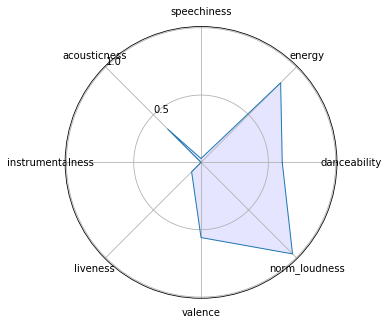

In [361]:
fig, ax = plt.subplots(figsize=(5,5), subplot_kw=dict(polar=True))
track = ft_kw[cat].iloc[0].values.tolist()
# list of categories
n = len(track)

# duplicate first value to close the plot
track += track[:1]

angles = [i / float(n) * 2 * pi for i in range(n)]
angles += angles[:1]

# Plot data
ax.plot(angles, track, linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, track, 'b', alpha=0.1)

#thetaticks = np.arange(0,360,45)
#ax.set_thetagrids(thetaticks, labels=cat, fontsize=10)

lines, labels = plt.rgrids((0.5, 1.0))
ax.set_rlabel_position(135)
ax.set_xticklabels(cat)
ax.xaxis.labelpad = 150

plt.show()

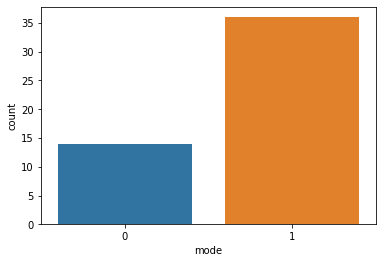

In [367]:
sns.countplot(x='mode', data=ft_kw, orient='v')
plt.show()

In [380]:
mod = sm.OLS(ft_kw.norm_loudness, ft_kw['mode'])
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:          norm_loudness   R-squared (uncentered):                   0.715
Model:                            OLS   Adj. R-squared (uncentered):              0.709
Method:                 Least Squares   F-statistic:                              122.8
Date:                Fri, 22 May 2020   Prob (F-statistic):                    5.98e-15
Time:                        22:43:49   Log-Likelihood:                         -34.431
No. Observations:                  50   AIC:                                      70.86
Df Residuals:                      49   BIC:                                      72.77
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [385]:
x_train, x_test = ft_kw.norm_loudness[:40], ft_kw.norm_loudness[40:] 

False

In [395]:
from sklearn.linear_model import LogisticRegression
t0 = time.time()

x = ft_kw.norm_loudness
y = ft_kw['mode']
# split train and test
x_train, x_test = x.values[:40], x.values[40:]

y_train, y_test = y.values[:40], y.values[40:]

# fit into model
clf = LogisticRegression()
res = clf.fit(x_train.reshape(-1,1), y_train)
coef = clf.coef_

# print run time
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
plt.show()

Example run in 0.005 s


In [396]:
res.predict(x_test.reshape(-1,1))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [399]:
score = clf.score(x_test.reshape(-1,1), y_test)
score

0.8

In [400]:
y_test

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [413]:
#ft_kw.insert(3, column='norm', value=ft_kw['norm_loudness'])
ft_kw.drop(['norm_loudness'], axis=1, inplace=True)
ft_kw.sort_values(by='mode', axis=0)

,danceability,energy,key,norm,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,name
id,,,,,,,,,,,,,,,
5NkpsRKvSBukdYQtl3WLZW,0.603,0.836,1,0.961033,-2.338,0,0.0288,0.350,0.000000,0.0990,0.5580,102.040,216556,4,Talk Love
13vO2F59LOFfWI6Wt5GZEW,0.525,0.559,8,0.883733,-6.976,0,0.0477,0.735,0.000000,0.1150,0.5120,172.037,194168,4,Fade out
1QEVsahE9GMF09j1M1Nq4c,0.289,0.356,0,0.834850,-9.909,0,0.0412,0.702,0.000016,0.1860,0.1460,134.736,288807,4,Regrets
2jU0uIIS2kKw4m36cqUU6M,0.464,0.609,0,0.897300,-6.162,0,0.0379,0.644,0.000000,0.1260,0.2580,139.655,216921,4,Symptoms
27Jpn99OPdTLz7MAVh3Dpy,0.456,0.619,10,0.919850,-4.809,0,0.0433,0.731,0.000000,0.1010,0.3530,139.762,218201,4,It’s not you
21s6Wtck0Ar4zOwnakPxOO,0.653,0.466,2,0.886883,-6.787,0,0.0284,0.530,0.000000,0.2690,0.2960,74.959,220882,4,wake
3yvfCjINIwnr6lhdQ0IcT3,0.399,0.492,11,0.899400,-6.036,0,0.0301,0.835,0.000000,0.1180,0.1880,137.768,277185,4,시리다
0mZWRRZ3jqGIRIPOwa07xe,0.527,0.637,6,0.909383,-5.437,0,0.0428,0.385,0.000000,0.1270,0.3030,157.843,215118,4,Butterfly
2wqTSNnrZhJxVs0Y4TWQO1,0.628,0.529,10,0.897550,-6.147,0,0.3160,0.437,0.000000,0.2060,0.5930,70.323,192962,4,Treat Me Bad


In [403]:
dots = sp.search('descendants of the sun', type='album')

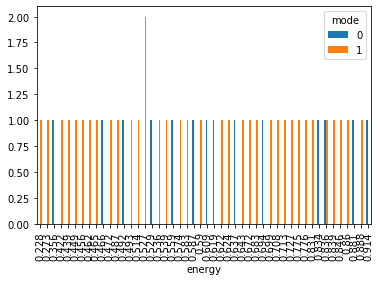

In [416]:
pd.crosstab(ft_kw.energy, ft_kw['mode']).div(ft_kw.sum(1).float).plot(kind='bar')